In [1]:
import sys
sys.path.insert(0, './renderer')
sys.path.insert(0, '../')

from collections import namedtuple
import render_car_instances as rci
import utils.utils as uts

Setting = namedtuple('Setting', ['image_name', 'data_dir'])
setting = Setting('180116_053947113_Camera_5', '../apolloscape/3d_car_instance_sample/')


INFO:root:loading 79 car models


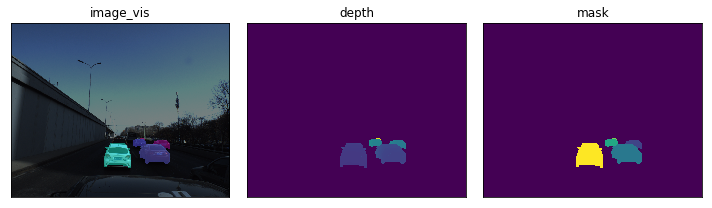

In [2]:
%matplotlib inline
visualizer = rci.CarPoseVisualizer(setting)
visualizer.load_car_models()
image_vis, mask, depth = visualizer.showAnn(setting.image_name)
